## L1 and L2 and Dropout regularization

In [ ]:
initializer = keras.regularizers.l1(0.01)

model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28,28]),
keras.layers.Dense(300, activation = "relu",),
keras.layers.Dense(400, activation = "relu", kernel_regularizer='l2')
keras.layers.Dense(100, activation = "relu", kernel_regularizer = initializer),
                                                                  keras.regularizers.l1_l2(l1=0.01, l2=0.01)
keras.layers.Dropout(rate=0.2),
keras.layers.Dense(10, activation = "softmax")
])

## Data augmentation

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [19]:
mnist = keras.datasets.cifar10
(X_train_full, y_train_full),(X_test,y_test) = mnist.load_data()

In [20]:
# https://keras.io/api/layers/preprocessing_layers/

data_augmentation = keras.Sequential([
  keras.layers.RandomFlip("horizontal_and_vertical"),
  keras.layers.RandomRotation(0.2),
])

In [21]:
image=X_train_full[12]

In [22]:
image = tf.expand_dims(image, 0)

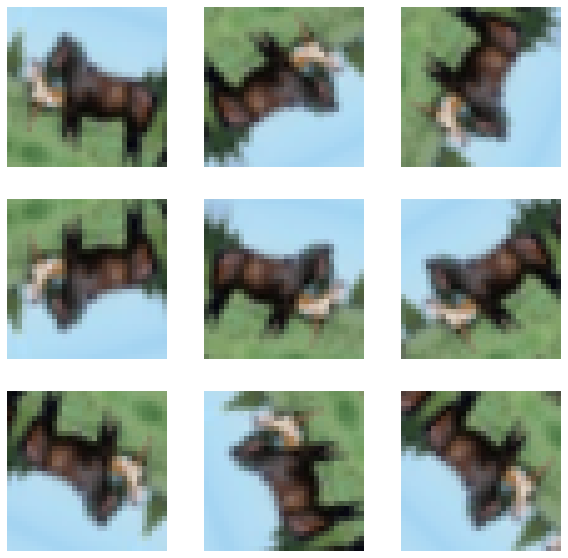

In [23]:
plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = data_augmentation(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis("off")

In [24]:
model = keras.models.Sequential([
  data_augmentation,
  # Rest of your model...
])

In [27]:
def visualize(original, augmented):
    fig = plt.figure()
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(original)

    plt.subplot(1,2,2)
    plt.title('Augmented image')
    plt.imshow(augmented)
    
image=X_train_full[12]

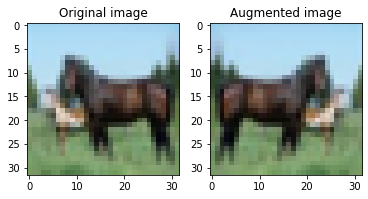

In [30]:
flipped = tf.image.flip_left_right(image)
visualize(image, flipped)

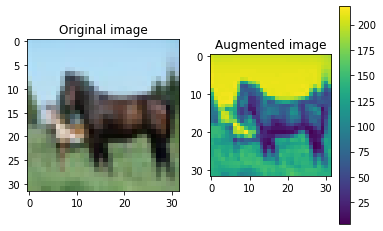

In [31]:
grayscaled = tf.image.rgb_to_grayscale(image)
visualize(image, tf.squeeze(grayscaled))
_ = plt.colorbar()

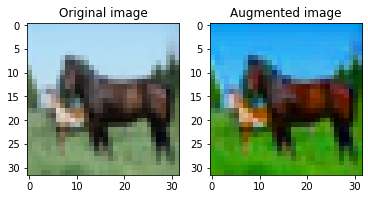

In [32]:
saturated = tf.image.adjust_saturation(image, 3)
visualize(image, saturated)

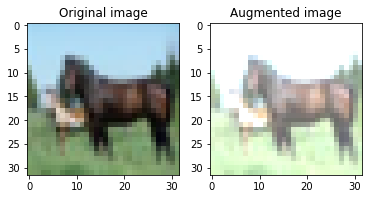

In [33]:
bright = tf.image.adjust_brightness(image, 0.4)
visualize(image, bright)

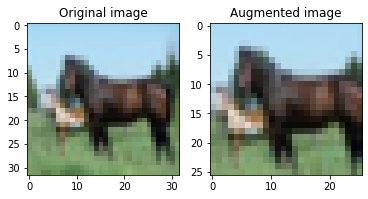

In [34]:
cropped = tf.image.central_crop(image, central_fraction=0.8)
visualize(image,cropped)

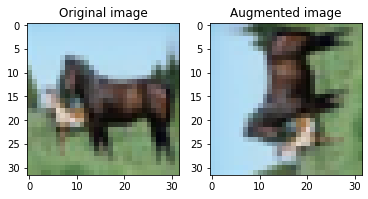

In [35]:
rotated = tf.image.rot90(image)
visualize(image, rotated)

In [3]:
# https://www.tensorflow.org/tutorials/images/data_augmentation